All decades, BERTopic, 30 topics

In [1]:
import pandas as pd
import numpy as np
import os

os.getcwd()

os.chdir("/Users/amymiao/Documents/UC Berkeley/Fall 8.27-12.16/Applied Computing/final-project-repo-group-four")

In [2]:
df = pd.read_csv('data/clean_processed.csv')

In [3]:
docs = df['Lyrics'].tolist()

In [4]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

stopwords_nltk = stopwords.words('english')
general_lyrics_stopwords = stopwords_nltk + [
    'la', 'lo', 'lola', 'du', 'oh', 'yeah', 'la la', 'lo lo', 'du du', 'got', 'gonna',
    'ooh', 'get', 'take', 'da', 'know', 'like', 'one', 'said', 'ron',
    'let', 'go', 'come', 'want', 'toke', 'say', 'day', 'good', 'see', 'make',
    'niggas', 'nigga', 'ya', 'choo', 'na', 'uh', 'yuh', 'hmm', 'wanna',
    'doo', 'dat', 'woo', 'nah', 'whoomp', 'yo', 'whoo', 'whatta', 'wa',
    'johnny', 'boaw', 'th', 'whoa', 'eh', 'ooo', 'um', 'dum', 'thy', 'oo',
    'the', 'on', 'and', 'ta', 'pa', 'oop', 'ha', 'bop', 'ah', 'yah', 'shes',
    'aa', 'im', 'ohoh', 'whats', 'huh', 'youre', 'dont', 'self', 'isnt', 'yeh', 
    'jo', 'cant', 'hes', 'uhuh', 'ive', 'yah','hmmmmm','ohh','woulda','nae','lil',
    'chh','ayy','aha','dit','ding','ling','feat','justin','mbabarara','rainin','burnin',
    'em','drake','sylvia','alejandro','mmm','whatcha','somethin','rumours'
]


vectorizer = CountVectorizer(
    stop_words=general_lyrics_stopwords
)

umap_model = UMAP(
    n_neighbors=10,
    n_components=10,
    min_dist=0.0,
    metric="cosine",
    random_state=SEED
)

hdbscan_model = HDBSCAN(  # HDBSCAN is for clustering 
    min_cluster_size=20,   # how many docs per topic (granularity)
    min_samples=10,      # how many clusters are allowed to be formed
    prediction_data=True,
    cluster_selection_method="leaf"  # leaf gives more granular topics
)

general_topic_model = BERTopic(    # top level model (compare with HDBSCAN and umap)
    embedding_model="all-distilroberta-v1",   # all-distilroberta-v1
    vectorizer_model=vectorizer,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    min_topic_size=20,      #if a topic survives HDBSCAN but is below this min_topic_size, it will get merged into another topic
    top_n_words=15,
    calculate_probabilities=True,
    verbose=True
)


/opt/anaconda3/envs/python310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
topics_general, probs_general = general_topic_model.fit_transform(docs)
# Reduce the number of topics (set to the number you want)
general_topic_model.reduce_topics(docs, nr_topics=30)

general_topic_model.get_topic_info()

2025-12-11 17:29:58,555 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 196/196 [02:28<00:00,  1.32it/s]
2025-12-11 17:32:29,840 - BERTopic - Embedding - Completed ✓
2025-12-11 17:32:29,841 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2025-12-11 17:32:41,324 - BERTopic - Dimensionality - Completed ✓
2025-12-11 17:32:41,325 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-11 17:32:41,577 - BERTopic - Cluster - Completed ✓
2025-12-11 17:32:41,583 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-11 17:32:41,956 - BERTopic - Representation - Completed ✓
2025-12-11 17:32:42,144 - BERTopic - Topic reduction - Reducing number of topics
2025-12-11 17:32:42,151 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-11 17:32:42,510 - BERTop

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4351,-1_love_baby_time_cause,"[love, baby, time, cause, never, girl, way, ba...",[ Where do they get off telling you That I am ...
1,0,229,0_love_never_heart_without,"[love, never, heart, without, away, cry, gone,...",[ I heard from a friend today And she said you...
2,1,194,1_baby_girl_cause_need,"[baby, girl, cause, need, back, mind, around, ...",[ I never felt nothing in the world like this ...
3,2,149,2_bitch_fuck_shit_back,"[bitch, fuck, shit, back, gon, money, city, tw...","[ Fuck bitches, get money (What?) Fuck niggas,..."
4,3,111,3_boogie_mony_shake_twist,"[boogie, mony, shake, twist, watch, dance, ton...","[(That's right) Get up and boogie, get up and ..."
5,4,99,4_love_baby_lovin_need,"[love, baby, lovin, need, girl, give, feel, lo...",[If you want my lovin' If you really do Don't ...
6,5,99,5_bay_crank_watch_soulja,"[bay, crank, watch, soulja, boy, wee, girl, wo...","[ Okay, check it, check it, check it out It'..."
7,6,96,6_baby_body_love_long,"[baby, body, love, long, way, girl, shake, fre...",[ What we gotta do right here is go back Back ...
8,7,91,7_chance_woman_girl_love,"[chance, woman, girl, love, man, mmmm, give, n...","[ Ain't another woman that can take your spot,..."
9,8,87,8_promise_hope_bright_believe,"[promise, hope, bright, believe, church, find,...",[ Well I see him on the TV Preachin' 'bout the...


In [6]:
# Re-visualize the intertopic distance map
fig = general_topic_model.visualize_topics()
fig.show()

In [ ]:
general_topic_model.visualize_documents(docs, topics=topics_general)

In [8]:
docs_per_topic = general_topic_model.get_representative_docs()
docs_per_topic[28]

[" I'm tryna put you in the worst mood, ah P1 cleaner than your church shoes, ah Milli point two just to hurt you, ah All red Lamb’ just to tease you, ah None of these toys on lease too, ah Made your whole year in a week too, yah Main bitch out your league too, ah Side bitch out of your league too, ah   House so empty, need a centerpiece 20 racks a table cut from ebony Cut that ivory into skinny pieces Then she clean it with her face man I love my baby You talking money, need a hearing aid You talking bout me, I don't see the shade Switch up my style, I take any lane I switch up my cup, I kill any pain   Look what you've done I’m a motherfuckin' starboy Look what you've done I'm a motherfuckin' starboy   Every day a nigga try to test me, ah Every day a nigga try to end me, ah Pull off in that Roadster SV, ah Pockets overweight, gettin' hefty, ah Coming for the king, that's a far cry, ah I come alive in the fall time, I No competition, I don't really listen I’m in the blue Mulsanne bump

In [9]:
# general_topic_model.reduce_topics(docs, nr_topics=30)

doc_info = general_topic_model.get_document_info(docs)
doc_info.head()


,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,In 1814 we took a little trip Along with Colo...,-1,-1_love_baby_time_cause,"[love, baby, time, cause, never, girl, way, ba...",[ Where do they get off telling you That I am ...,love - baby - time - cause - never - girl - wa...,0.042280,False
1,"Oh the shark, babe Has such teeth, dear And he...",-1,-1_love_baby_time_cause,"[love, baby, time, cause, never, girl, way, ba...",[ Where do they get off telling you That I am ...,love - baby - time - cause - never - girl - wa...,0.157202,False
2,Over and over I tried to prove my love to you ...,-1,-1_love_baby_time_cause,"[love, baby, time, cause, never, girl, way, ba...",[ Where do they get off telling you That I am ...,love - baby - time - cause - never - girl - wa...,0.035419,False
3,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",21,21_fire_burning_burn_hot,"[fire, burning, burn, hot, venus, heat, desire...",[ Burn baby burn Burn baby burn Burn baby burn...,fire - burning - burn - hot - venus - heat - d...,0.506149,False
4,I'm just a lonely boy Lonely and blue I'm all ...,-1,-1_love_baby_time_cause,"[love, baby, time, cause, never, girl, way, ba...",[ Where do they get off telling you That I am ...,love - baby - time - cause - never - girl - wa...,0.436262,False


In [10]:
# keep only the 'Topic' column and reset index to align with df
df = df.reset_index(drop=True)
doc_info = doc_info.reset_index(drop=True)

df_topics = pd.concat(
    [df, doc_info[['Topic']]], 
    axis=1
)

df_topics.head()

,Year,Artist,Song Title,Rank,Lyrics,Nouns,Verbs,Adverbs,Corpus,Word Counts,Unique Word Counts,Topic
0,1959,Johnny Horton,The Battle Of New Orleans,1,In 1814 we took a little trip Along with Colo...,trip bacon bean town gun comin while river of'...,take take take catch fire keep be be fire begi...,along as ago once more so as ago once more the...,take little trip colonel jackson mighty missis...,435,155,-1
1,1959,Bobby Darin,Mack The Knife,2,"Oh the shark, babe Has such teeth, dear And he...",shark babe tooth jackknife babe sight shark to...,have show have keep know bite billow spread be...,pearly just so never never now just just down ...,oh shark babe tooth dear show pearly white jac...,224,145,-1
2,1959,Lloyd Price,Personality,3,Over and over I tried to prove my love to you ...,love friend fool fool personality personality ...,try prove do say get get do cause get get do s...,over over over over over over so over now over...,try prove love friend say fool fool cause get ...,215,55,-1
3,1959,Frankie Avalon,Venus,4,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",girl girl kiss arm girl charm girl sunlight ha...,send thrill want make take place ask promise g...,surely too always as long surely too always as...,hey venus oh venus venus send little girl thri...,166,74,21
4,1959,Paul Anka,Lonely Boy,5,I'm just a lonely boy Lonely and blue I'm all ...,boy nothing moment love night day boy nothing ...,do get think want love love kiss hold like hea...,just all just all just so hard just all,lonely boy lonely blue get think want love yes...,140,68,-1


In [11]:
# create a 'Decade' column if wanted
# df_topics['Decade'] = (df_topics['Year'] // 10) * 10

# 1. calculate counts of songs per topic per year
counts = (
    df_topics
      .groupby(['Year', 'Topic'], as_index=False)
      .size()                      # This generates a column named 'size'
      .rename(columns={'size': 'n'})
)

# 2. Within each year, convert n to the proportion
counts['prop'] = counts.groupby('Year')['n'].transform(lambda x: x / x.sum())

# 3. This is the final table used for plotting
topic_trend = counts[['Year', 'Topic', 'prop']]

topic_trend.head()


,Year,Topic,prop
0,1959,-1,0.816092
1,1959,0,0.034483
2,1959,4,0.011494
3,1959,6,0.011494
4,1959,7,0.011494


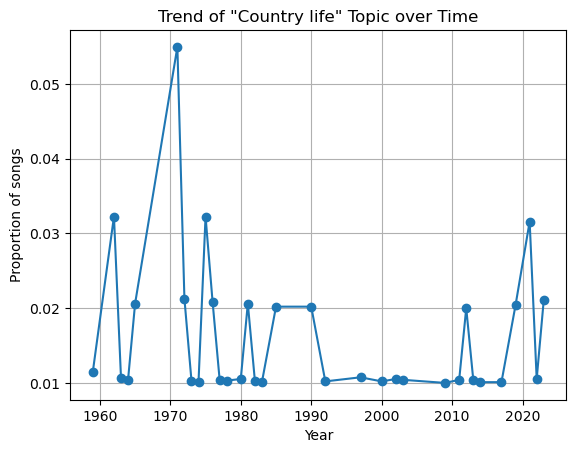

In [12]:
import matplotlib.pyplot as plt

country_topic_id = 11   

country_ts = topic_trend[topic_trend['Topic'] == country_topic_id]

plt.plot(country_ts['Year'], country_ts['prop'], marker='o')
plt.xlabel('Year')
plt.ylabel('Proportion of songs')
plt.title('Trend of "Country life" Topic over Time')
plt.grid(True)
plt.show()

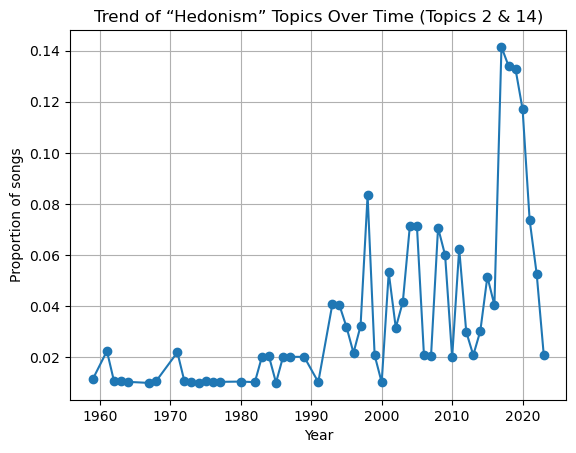

In [13]:
import matplotlib.pyplot as plt

hedonism_ids = [2, 14]

hed_ts = topic_trend[topic_trend['Topic'].isin(hedonism_ids)]

# combine
hed_ts = hed_ts.groupby('Year', as_index=False)['prop'].sum()

plt.plot(hed_ts['Year'], hed_ts['prop'], marker='o')
plt.xlabel('Year')
plt.ylabel('Proportion of songs')
plt.title('Trend of “Hedonism” Topics Over Time (Topics 2 & 14)')
plt.grid(True)
plt.show()


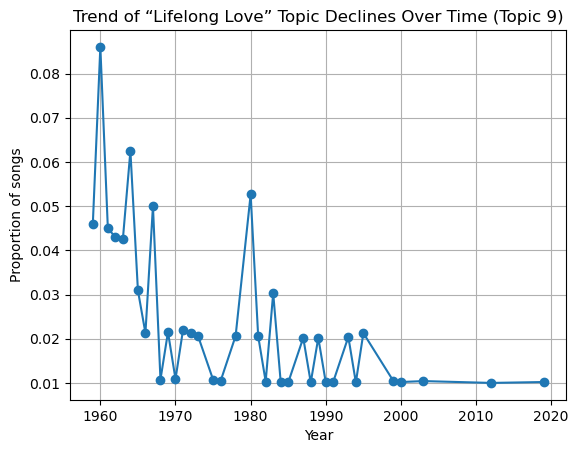

In [14]:
import matplotlib.pyplot as plt

#hedonism_ids = [2, 14]

#hed_ts = topic_trend[topic_trend['Topic'].isin(hedonism_ids)]

love_topic_id = 9   

love_ts = topic_trend[topic_trend['Topic'] == love_topic_id]
# combine
love_ts = love_ts.groupby('Year', as_index=False)['prop'].sum()

plt.plot(love_ts['Year'], love_ts['prop'], marker='o')
plt.xlabel('Year')
plt.ylabel('Proportion of songs')
plt.title('Trend of “Lifelong Love” Topic Declines Over Time (Topic 9)')
plt.grid(True)
plt.show()


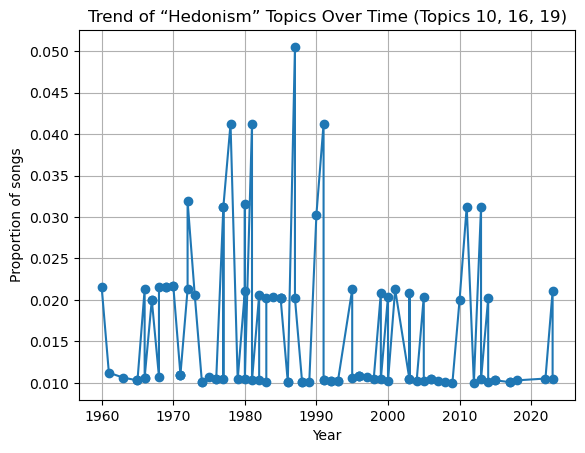

In [ ]:
import matplotlib.pyplot as plt

#hedonism_ids = [10, 16,19]

#hed_ts = topic_trend[topic_trend['Topic'].isin(hedonism_ids)]

love_topic_id = 9   

love_ts = topic_trend[topic_trend['Topic'] == love_topic_id]
# combine
# love_ts = love_ts.groupby('Year', as_index=False)['prop'].sum()

plt.plot(love_ts['Year'], love_ts['prop'], marker='o')
plt.xlabel('Year')
plt.ylabel('Proportion of songs')
plt.title('Trend of “Hedonism” Topics Over Time (Topics 10, 16, 19)')
plt.grid(True)
plt.show()


Big themes

In [15]:
theme_map = {
    1: 'Love', 4: 'Love',
    6: 'Love', 7: 'Love',
    9: 'Love', 12: 'Love',
    17: 'Love', 18: 'Love',
    23: 'Love', 25: 'Love',
    3: 'Dancing', 5: 'Dancing', 26: 'Dancing',
    2: 'Hedonism', 14:'Hedonism',
    10: 'External/Internal Tensions',
    16: 'External/Internal Tensions',
    19: 'External/Internal Tensions',
    #8: 'Other', 11: 'Other', 21: 'Other',
    #22: 'Other', 27: 'Other', 28: 'Other',
}


In [16]:
df_topics['Theme'] = df_topics['Topic'].map(theme_map)


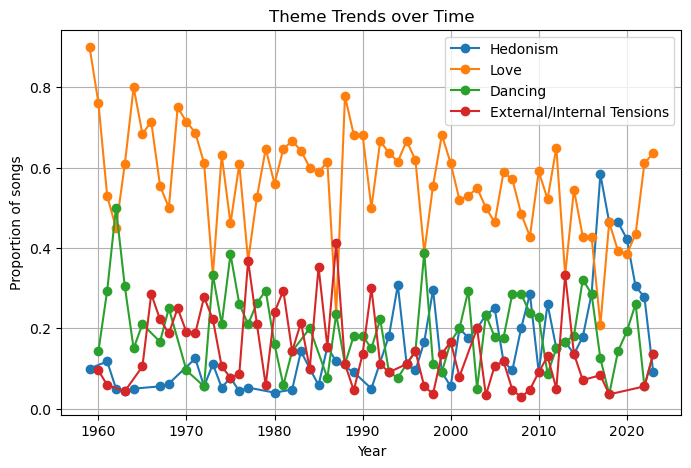

In [17]:
# 1. drop those rows where 'Theme' is NaN
df_theme = df_topics.dropna(subset=['Theme'])

# 2. Year × Theme
theme_counts = (
    df_theme
    .groupby(['Year', 'Theme'], as_index=False)
    .size()
    .rename(columns={'size': 'n'})   # n = how many songs in that year belong to that theme
)

# 3. Within each year, convert n to the proportion of that theme in that year
theme_counts['prop'] = theme_counts.groupby('Year')['n'].transform(
    lambda x: x / x.sum()
)

# 4. Final trend table (optional, keep only necessary columns)
theme_trend = theme_counts[['Year', 'Theme', 'prop']]

# 5. plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for theme in theme_trend['Theme'].unique():
    sub = theme_trend[theme_trend['Theme'] == theme]
    plt.plot(sub['Year'], sub['prop'], marker='o', label=theme)

plt.xlabel('Year')
plt.ylabel('Proportion of songs')
plt.title('Theme Trends over Time')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
theme_map = {
    1: 'Negative Love', 4: 'Positive Love',
    6: 'Positive Love', 7: 'Positive Love',
    9: 'Positive Love', 12: 'Positive Love',
    17: 'Positive Love', 18: 'Negative Love',
    23: 'Negative Love', 25: 'Negative Love',
}
